# Question 1 <div style="text-align: right"> [10 pts] </div>

### 1. Import Libraries (keep them here for clarity) <div style="text-align: right"> [0.25 pts] </div>

In [ ]:
# General imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Imports for Assignment Part 1
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

# Imports for Assignment Part 2
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


### 2. Load the dataset <div style="text-align: right"> [0.5 pts] </div>

#### Use : 'boston housing' dataset from sklearn

In [ ]:
# Importing Boston housing dataset from the orignal link as sklean is deprecated
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

### 3.  Seggregate data in variables <div style="text-align: right"> [0.25 pts] </div>

In [ ]:
# Assigning data as X and target as Y
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [ ]:
# Printing the data and traget variables
print(X)
print(y)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

### 4.  Convert in Pandas Dataframe and show as below <div style="text-align: right"> [0.25 pts] </div>

In [ ]:
# Converting into dataframe
attributes = ["CRIM","ZN","INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
"RAD" , "TAX", "PTRATIO" ,"B", "LSTAT"]#, "MEDV"]
df = pd.DataFrame(X, columns=attributes)


In [ ]:
# Printing dataframe in expected format
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
df['PRICE'] = y
# Copying dataframe to another dataframe to use later
df_2 = df

### 5.  Split the dataset into training and testing sets <div style="text-align: right"> [0.5 pts] </div>

#### Note : test size --> 20% and random state ---> 111

In [ ]:
# Splitting the dataset into training and testing with test set as 20% and random state as 111 as specified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=111)

### 6. Explain the differences between Linear /  Ridge regression <div style="text-align: right"> [1 pts] </div>

Linear Regression is a commonly used technique for predictive modeling.
It helps modelling the relationship between a dependent and independent variables where the goal is to fit the linear equation that can make predictions based on the given input features.

Ridge Regression is an extension of the linear regression model. It adds a regularization term to the linear regression loss function, and helps reduce the complexity of the model.

#### 6.1. Magnitude of Coefficients:

In linear regression, magnitude of coefficients is calculated using the least square methods. The features with higher magnitude can have a stronger impact on the target variable and can lead to overfitting.

In case of Ridge regression, it introduces L2 regularization which adds a penalty term to the loss function.


In [ ]:
# Building the models
ln = LinearRegression()
rd = Ridge(alpha=1.0)
ln.fit(X, y)
rd.fit(X, y)
linear = (ln.coef_)
ridge = (rd.coef_)

# Extracting the linear and ridge coefficients
linear, ridge

(array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
        -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
         3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]),
 array([-1.04595278e-01,  4.74432243e-02, -8.80467889e-03,  2.55239322e+00,
        -1.07770146e+01,  3.85400020e+00, -5.41453810e-03, -1.37265353e+00,
         2.90141589e-01, -1.29116463e-02, -8.76074394e-01,  9.67327945e-03,
        -5.33343225e-01]))

#### 6.2. Fitting (Over/Under):

Linear regression is more prone to over fitting in case there is multicollinearity in the data.


Ridge regression tackles the issue of over fitting by adding the regularization term to the cost function. This helps penalize the extreme coefficients and reduce over fitting.

#### 6.3. Feature Importance:

Generally the features which have relatively larger coefficient magnitudes have a stronger influence on the dependent variable. Below is the graph with some of the important features that exhibit larger coefficient magnitudes.

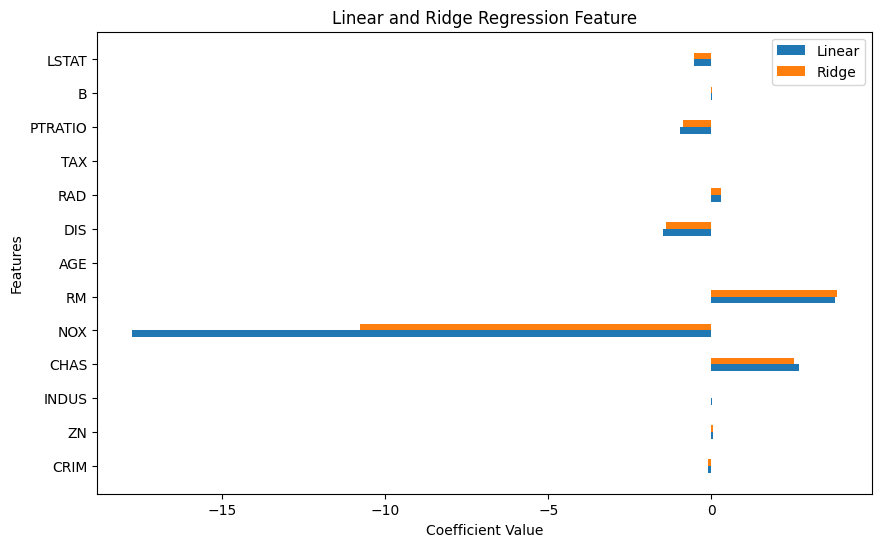

In [ ]:
# Building a dataframe with features and coefficients that were calculated above
features = pd.DataFrame({'Feature': attributes, 'Linear': linear, 'Ridge': ridge})

# Plotting the graph for feature coefficients
fig, axis = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(features))

linear_bars = axis.barh(index - bar_width/2, features['Linear'], bar_width, label='Linear')
ridge_bars = axis.barh(index + bar_width/2, features['Ridge'], bar_width, label='Ridge')

axis.set_title('Linear and Ridge Regression Feature')
axis.set_xlabel('Coefficient Value')
axis.set_ylabel('Features')

# Set the y-axis labels using plt.yticks
plt.yticks(index, features['Feature'])

axis.legend()
plt.show()

#### 6.4. Model Complexity:

Both linear and ridge models have 13 coefficients. However, the Ridge model introduces an additional layer of complexity through the regularization parameter (alpha). This parameter allows Ridge regression model to control the magnitude of the coefficients, helping prevent overfitting and making the model more robust when dealing with multicollinearity in the data.

### 7. Implement Linear Regression - sklearn <div style="text-align: right"> [1 pts] </div>

In [ ]:
# Building linear regression model using the 'LinearRegression' sklearn model library
ln = LinearRegression()
ln.fit(X_train, y_train)
y_pred = ln.predict(X_test)
print(y_pred)

[29.5005545  29.29397365 31.87810007 20.71306785 42.30839914 26.94755908
 35.22605324 15.59816095 24.69453552 14.17692785 27.62292606 43.46452846
 23.3127009  31.12096005 20.19012208 24.43851472 24.48734013 22.10378257
 13.70297321 17.83494869 14.04195096 27.26997809 22.84584481 25.42566519
  8.30084316 19.1167088  36.74849539 24.63459996 20.96331149  1.40319753
 32.61773855 10.087989    8.91476122 29.62013093 37.85693481 24.4967708
  8.36882889 40.51104853 24.28864983 17.07989649 24.98468868 19.46693134
 14.00882221 22.92965305 21.1172161  34.01053609 30.61543162 13.86868865
 31.94480173 20.27358781 23.47659771 27.50776324 15.80259191 22.36273204
 24.55667873 22.2452275  19.49479712 22.67556211 16.94687684 21.67095588
 27.04548921 22.62960797 26.09473356 20.68208343 23.45286899 25.0690331
 32.42362195 35.93180201 27.95066344 22.76907815 25.12068536 20.07277438
 13.3972728  16.51190483 36.37984964 22.65731718 27.7591453  29.45140375
 22.35760255 32.37752341 12.03792256 13.25421625  9.9

### 8. Implement Ridge Regression with lambda = 1.0 - sklearn <div style="text-align: right"> [1 pts] </div>

In [ ]:
# Building Ridge regression model using the 'Ridge' sklearn model library
rd = Ridge(alpha=1.0)
rd.fit(X_train, y_train)
y_pred_rd = rd.predict(X_test)
print(y_pred_rd)

[29.15930804 29.03969403 31.95563071 20.33744046 41.9709915  27.10958635
 34.93704307 15.80816905 24.34560014 14.5429285  27.78732871 43.14981878
 22.9967266  30.85139418 20.31090831 24.55172095 24.77503377 21.80833605
 13.80270924 17.54308412 13.31806029 26.95613346 22.48151962 25.94730989
  7.99060408 18.85738849 36.69584105 24.89567767 21.68631908  0.40051235
 32.52259692 10.38327714 10.22449463 29.30327701 37.63973429 24.40309018
  8.38490175 40.64035582 24.4372403  17.25084911 24.80161254 18.73245102
 14.30039027 22.95049032 21.26559587 34.39431991 30.478319   13.8427807
 31.53478416 19.87481648 23.4978292  27.41002137 15.9674534  22.93610784
 24.58428243 22.14397739 20.02443006 22.4038759  17.34714426 21.74199122
 26.34968028 23.23210505 26.42590084 20.78442085 23.27115528 25.60369054
 32.2086246  36.2817755  28.09515123 23.11282137 25.35712238 21.44059387
 13.45469711 16.75725086 36.08743419 22.33172343 27.85588519 29.28588004
 23.16101547 32.2603491  13.2603421  13.46084233 10.

### 9. Evaluate the models (M.S.E) <div style="text-align: right"> [0.5 pts] </div>

In [ ]:
# Calculating the Mean Squared Error for Linear and Ridge regression
print("Linear Regression Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Ridge Regression Mean Squared Error: ", mean_squared_error(y_test, y_pred_rd))

Linear Regression Mean Squared Error:  23.06642842406862
Ridge Regression Mean Squared Error:  23.63737071708967


### 10. Plot the coefficients of Linear and Ridge Regression models <div style="text-align: right"> [0.5 pts] </div>

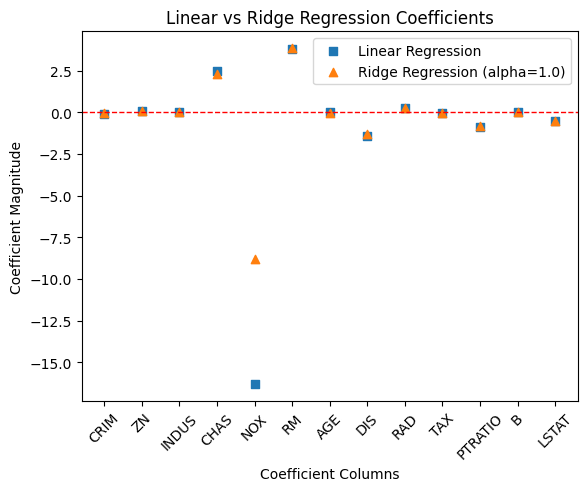

In [ ]:
# Plotting the coefficients of Linear and Ridge Regression models

# Access the coefficients weights of the features that were learned by the Linear and Ridge regression models
linear = (ln.coef_)
ridge = (rd.coef_)

x_positions = np.arange(len(attributes))
x_labels = attributes

# Plot a scatter plot
plt.scatter(x_positions, linear, marker='s', label='Linear Regression')
plt.scatter(x_positions , ridge, marker='^', label='Ridge Regression (alpha=1.0)')

# Plot a line through y = 0
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)

# Assign X labels and rotate by 45 degrees for better readability
plt.xticks(x_positions, x_labels)
plt.xticks(rotation=45)

# Add Labels
plt.xlabel("Coefficient Columns")
plt.ylabel("Coefficient Magnitude")

# Add Title
plt.title("Linear vs Ridge Regression Coefficients")
plt.legend()
plt.show()

### 11. What are the 'N' most important features in our data according to your graph? <div style="text-align: right"> [0.25 pts] </div>

The 'N' most important features are : 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'.

### 12. Remove All other features and keep your selected 'N' features <div style="text-align: right"> [0.25 pts] </div>

In [ ]:
# Dropping other features and only keeping 'N' features
columns_to_drop = ["CRIM", "ZN", "INDUS", "AGE", "RAD", "TAX", "B"]
df_2 = df_2.drop(columns_to_drop, axis=1)

In [ ]:
# Printing the new dataframe
df_2.head()

,CHAS,NOX,RM,DIS,PTRATIO,LSTAT,PRICE
0,0.0,0.538,6.575,4.0900,15.3,4.98,24.0
1,0.0,0.469,6.421,4.9671,17.8,9.14,21.6
2,0.0,0.469,7.185,4.9671,17.8,4.03,34.7
3,0.0,0.458,6.998,6.0622,18.7,2.94,33.4
4,0.0,0.458,7.147,6.0622,18.7,5.33,36.2


In [ ]:
# Selecting the features data
X = df_2.iloc[:,:-1]
print(X)

     CHAS    NOX     RM     DIS  PTRATIO  LSTAT
0     0.0  0.538  6.575  4.0900     15.3   4.98
1     0.0  0.469  6.421  4.9671     17.8   9.14
2     0.0  0.469  7.185  4.9671     17.8   4.03
3     0.0  0.458  6.998  6.0622     18.7   2.94
4     0.0  0.458  7.147  6.0622     18.7   5.33
..    ...    ...    ...     ...      ...    ...
501   0.0  0.573  6.593  2.4786     21.0   9.67
502   0.0  0.573  6.120  2.2875     21.0   9.08
503   0.0  0.573  6.976  2.1675     21.0   5.64
504   0.0  0.573  6.794  2.3889     21.0   6.48
505   0.0  0.573  6.030  2.5050     21.0   7.88

[506 rows x 6 columns]


In [ ]:
# Selecting the target variable
y = df_2['PRICE']
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64


In [ ]:
# Splitting the dataset into training and testing with test set as 20% and random state as 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### 13. Re calculate the M.S.E  <div style="text-align: right"> [1.5 pts] </div>

In [ ]:
# Building linear regression model using the 'LinearRegression' sklearn model library
ln = LinearRegression()
ln.fit(X_train, y_train)
y_pred = ln.predict(X_test)
print(y_pred)

[28.85516944 35.54054051 17.48609658 25.50921617 16.60825163 24.33509295
 17.39698534 13.88164479 21.44224431 20.36174139 24.42444606 18.86135924
 -1.14334639 22.77016588 19.15283578 24.54620687 18.64043046  3.97872397
 39.03239345 15.75301552 26.29351583 28.67706873 11.44508388 24.03082273
 16.67864241 14.6856565  23.59626071 17.57469037 22.73065421 18.97879712
 21.97740163 25.12100371 25.3720093  15.59706759 15.34574154 17.89065196
 31.97989822 19.3435389  24.22599095 25.18159909 13.34066464 30.01055184
 40.2533324  18.0846838  27.71440533 14.86976699 14.30492182 26.40971229
 18.38735897 30.81952968 21.46588557 33.66336819 15.84192494 26.67528714
 38.77780035 21.03306408 16.54557731 30.53615818 25.23319542 12.76347195
 21.91620168 28.57576965 30.90088894 16.93114715 22.2572847  16.71908174
 18.62800633 25.69817421 28.98548556 13.94536885 20.21335612 26.36788479
 11.0100745  15.89272345 24.62090911  6.81230967 21.83926841 38.92335987
 17.41674772 11.77166608 21.79468446 11.8146936  20

In [ ]:
# Building Ridge regression model using the 'Ridge' sklearn model library
rd = Ridge(alpha=1.0)
rd.fit(X_train, y_train)
y_pred_rd = rd.predict(X_test)

In [ ]:
# Calculating the Mean Squared Error for Linear and Ridge regression
print("Linear Regression Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Ridge Regression Mean Squared Error: ", mean_squared_error(y_test, y_pred_rd))

Linear Regression Mean Squared Error:  24.972510732890797
Ridge Regression Mean Squared Error:  24.906899575754203


### 14. Re Plot the coefficients  <div style="text-align: right"> [0.25 pts] </div>

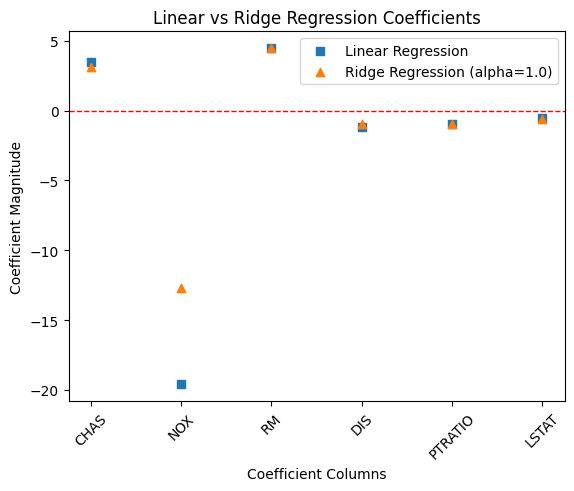

In [ ]:
# Plotting the coefficients of Linear and Ridge Regression models

attributes = ["CHAS", "NOX", "RM", "DIS","PTRATIO" , "LSTAT"]

# Access the coefficients weights of the features that were learned by the Linear and Ridge regression models
linear_updated = (ln.coef_)
ridge_updated = (rd.coef_)

x_positions = np.arange(len(attributes))
x_labels = attributes

# Plot a scatter plot
plt.scatter(x_positions, linear_updated, marker='s', label='Linear Regression')

plt.scatter(x_positions , ridge_updated, marker='^', label='Ridge Regression (alpha=1.0)')

# Plot a line through y = 0
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)

# Assign X labels and rotate by 45 degrees for better readability
plt.xticks(x_positions, x_labels)
plt.xticks(rotation=45)

# Add Labels
plt.xlabel("Coefficient Columns")
plt.ylabel("Coefficient Magnitude")

plt.title("Linear vs Ridge Regression Coefficients")
plt.legend()
plt.show()

### 15. Do you think you picked the correct 'N' features? Explain your rationale.! <div style="text-align: right"> [0.5 pts] </div>

The 'N' most important features are : 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'. Here, the features selected have a comparatively larger coefficient magnitudes which means they have a stronger influence on the dependent variable (which in this case is price variable).

### 16. Write About (what are they and what do they impact) <div style="text-align: right"> [0.5 pts] </div>

Selected features:
1. CHAS : Charles River dummy variable and indicates if the area is bounded by the river or not. If value= 1, tract bounds river, otherwise 0. It's important as this might add to the higher value of a property.
2. NOX : This represents the Nitric oxides concentration in the area. It's important as higher concentration of the chemical indicates poor air quality and might not be a suitable place to live hence reducing the value of housing.
3. RM : This represents the average number of rooms per dwelling. More room generally tend to have a higher price.
4. DIS : This represents the weighted distances to five Boston employment centers. Areas that are closer to the employment zones can have higher property price hence this variable can have an impact on the pricing.
5. PTRATIO : Pupil-teacher ratio by town. Higher PTRATIO can often indicate better education system and hence can attract families which can lead to a higher price.
6. LSTAT : Represents lower status of the population. LSTAT represents the percentage of people that are classified in the lower status/income area. This can directly impact the price of the property value if LSTAT is higher or lower.

#### 16.1. Magnitude of Coefficients

In regression, magnitude of coefficients refers to the absolute values of coefficients of independent variables in the model.

Maginitude of the coefficients depict the strength and the relation of independent variables with the dependent varaible.

In [ ]:
features = pd.DataFrame({'Feature': X.columns,'Linear': linear_updated,'Ridge': ridge_updated})
features

,Feature,Linear,Ridge
0,CHAS,3.504341,3.152965
1,NOX,-19.582321,-12.674345
2,RM,4.468614,4.465908
3,DIS,-1.193015,-0.957934
4,PTRATIO,-0.961053,-0.932551
5,LSTAT,-0.560380,-0.597673


#### 16.2. Sign of Coefficients

As seen above, the sign of coefficients represents the direction of the relation between the independent and dependent variable. A negative sign indicates an inverse relation, where an increase in independent variable leads to the decrease in dependent variable. A positive sign indicates a directly proportional relation where increase in independent variable leads to an increase in dependent variable.

Example:
For the variable NOX, Linear: -19.582, Ridge: -12.674, an increase in nitric oxides concentration tends to be associated with a decrease in the target varaible i.e. the median value of homes, which represents higher pollution reduces the property value.

### 17.Why is there any difference between the coefficients of the two (linear/ridge) models (if any)? <div style="text-align: right"> [0.5 pts] </div>

The main point of difference between the coefficients of linear and ridge regression is due to the regularization in ridge regression.

Regularization includes a penalty term and also helps handle overfitting in case of multicollinearity between the variables.  


### 18. What optimisation (cost reduction) method did you used? <div style="text-align: right"> [0.5 pts] </div>

 Linear Regression generally uses the Ordinary Least Squares (OLS) method, which aims to minimize the sum of squared differences between the observed and predicted values.

 Whereas Ridge Regression uses an L2 regularization term, which aims to minimizes the residual sum of squares and also adds a penalty on the size of coefficients.

# Question 2(10 points)

You have been provided with a comprehensive dataset containing customer data collected during a recent marketing campaign. The primary objective of this assignment is to leverage machine learning techniques to predict whether a customer will respond positively (1) or negatively (0) to a promotional offer. The dataset encompasses a variety of customer attributes, including age, income, and previous purchase history.

a. Load and preprocess the dataset, preparing it for machine learning.

In [ ]:
# Importing and printing the dataset
data2 = pd.read_csv("Assignmnet2_Question2.csv", delimiter=';')
eda_data = data2
data2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# View the Data distribution
data2.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# Exploring the variables
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Checking for Null values
data2.isnull().sum()
# Filling missing values with 0 for Income column
data2['Income'].fillna(data2['Income'].median(), inplace = True)
data2.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
# Looking into the object column type
data2.iloc[:,7].unique()
data2.iloc[:,2].unique()
data2.iloc[:,3].unique()

# Transforming Dt_Customer to year column and dropping Dt_Customer
data2['Year'] = pd.to_datetime(data2['Dt_Customer']).dt.year
data2 = data2.drop('Dt_Customer', axis=1)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [ ]:
# Assigning other categorical columns as categorical for further transformation
c_columns = data2.select_dtypes(include=['object']).columns.tolist()
# Printing categorical columns
c_columns

['Education', 'Marital_Status']

In [ ]:
# Assigning numerical columns for further transformation
n_columns = data2.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Dropping response and ID varaible
n_columns.remove('Response')
n_columns.remove('ID')

In [ ]:
# Scaling numerical columns and encoding categorical columns
n_tranformer = Pipeline(steps=[('scaler', StandardScaler())])
c_tranformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Preprocessor
pp = ColumnTransformer(
    transformers=[
        ('numeric', n_tranformer, n_columns),
        ('categorical', c_tranformer, c_columns)
    ])


b. Perform EDA on data

<Axes: xlabel='Response', ylabel='count'>

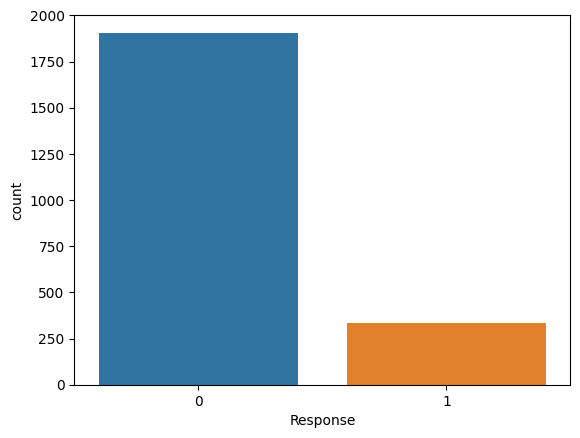

In [ ]:
# Distribution of target variable
sns.countplot(x='Response', data=eda_data)

<Axes: xlabel='Year_Birth', ylabel='Count'>

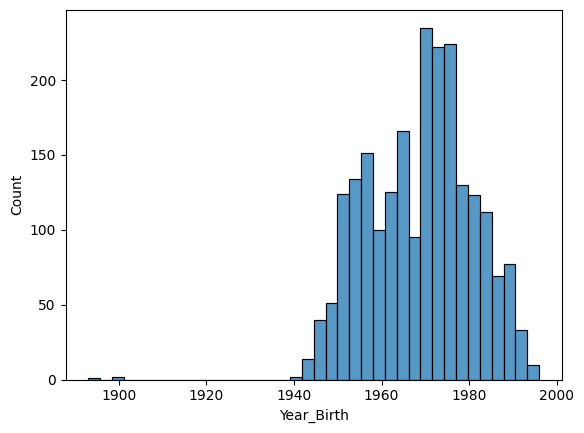

In [ ]:
# Distribution of birth year
sns.histplot(x='Year_Birth', data=eda_data)

<Axes: xlabel='Education', ylabel='Count'>

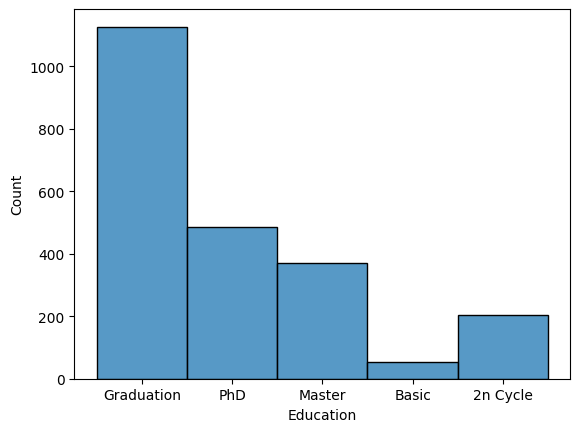

In [ ]:
# Distribution of Education
sns.histplot(x='Education', data=eda_data)

<Axes: xlabel='Marital_Status', ylabel='count'>

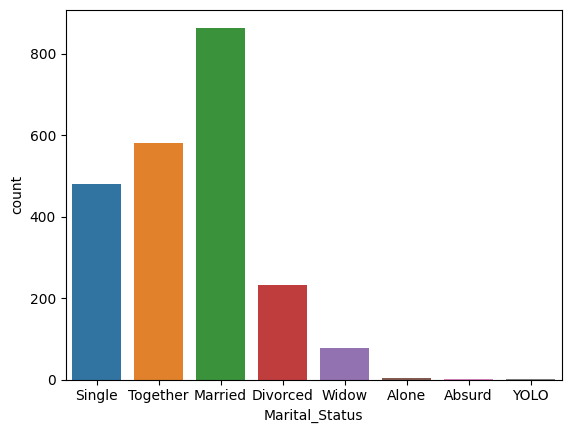

In [ ]:
# Distribution of marital status variable
sns.countplot(x='Marital_Status', data=eda_data)

<Axes: xlabel='Income', ylabel='Count'>

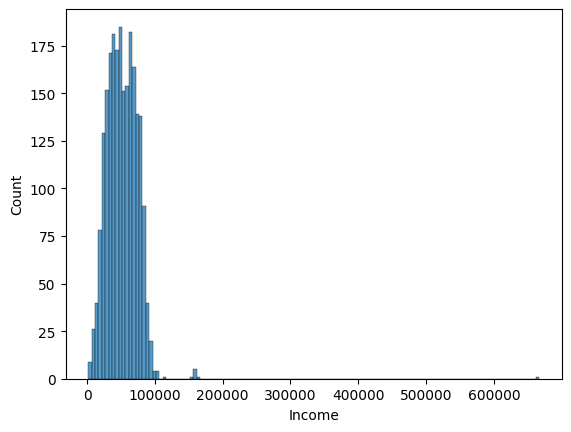

In [ ]:
# Distribution of Income
sns.histplot(x='Income', data=eda_data)

c. Split the data into training and testing sets.

In [ ]:
# Assigning target and dependent variables
X = data2.drop(['ID','Response'],axis=1)
y = data2['Response']

In [ ]:
print(X)

      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  NumWebVisitsMonth  \
0          58       

In [ ]:
print(y)

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64


In [ ]:
# Splitting the dataset between train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

d. Train both a **Perceptron model and a Logistic Regression model** on the training data to predict customer responses to the promotional offer. (Note: Implement both the models from scratch, Don't use any pretrained model)

# **Logistic Regression from Scratch**

In [ ]:
# Logistic Regression

# Creating a class for Logistic Regression
class LogisticRegression():

    # Initializing the learning_rate and iteration parameters
    def __init__(self, learning_rate, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias_value = None

    # Defining sigmoid function calculation
    def calculateSigmoidFunction(self, z):
      return 1/(1+np.exp(-z))

    # Defining the training function
    def train(self, X, y):

        m, n = X.shape
        # Initializing the weights for features as zero
        self.weights = np.zeros(n)
        # Initializing the bias as zero
        self.bias_value = 0

        # Repeating the process for n number of iterations
        for i in range(self.iterations):
            # Calculate linear predictions using the formula y = mx + c (linear_predictions = X * weights + bias)
            linear_predictions = np.dot(X, self.weights) + self.bias_value
            # Our aim is to classify so apply sigmoid functions to get binary predictions
            predictions = self.calculateSigmoidFunction(linear_predictions)
            # Use gradient descent to calculate updated weights and bias values
            updated_weights = (1/m) * np.dot(X.T, predictions - y)
            updated_bias_value = (1/m) * np.sum(predictions - y)
            # Update the weights and bias values
            self.weights = self.weights - self.learning_rate * updated_weights
            self.bias_value = self.bias_value - self.learning_rate * updated_bias_value

    # Defining the prediction function
    def predict(self, X):
        # Calculate linear predictions using the formula y = mx + c (linear_predictions = X * weights + bias)
        linear_predictions = np.dot(X, self.weights) + self.bias_value
        # Our aim is to classify so apply sigmoid functions to get binary predictions
        y_pred = self.calculateSigmoidFunction(linear_predictions)
        # Setting the threshold as 0.5. If predicted value is less that 0.5, assign to class 0 else assign to 1
        predicted_value = [0 if y<=0.5 else 1 for y in y_pred]
        # Return the final value
        return predicted_value

In [ ]:
# Apply transformations to the training and testing data sets
X_train_pp = pp.fit_transform(X_train)
X_test_pp = pp.transform(X_test)

# Initailzing the LogisticRegression instance
lr = LogisticRegression(0.01)
# Training using the train dataset
lr.train(X_train_pp, y_train)
# Predicting on test dataset
y_pred = lr.predict(X_test_pp)

# **Perceptron Model from Scratch**

In [ ]:
# Creating a class for Perceptron
class Perceptron:

    # Initializing the learning_rate and iteration parameters
    def __init__(self, learning_rate, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias_value = None

    # Defining unit step function calculation
    def calculateUnitStepFunction(self, z):
      #  Apply the unit step function incase z is greater than 0, return 1 else return 0
      return np.where(z > 0 , 1, 0)

    # Defining the training function
    def train(self, X, y):
        m, n = X.shape

        # Initializing the weights for features as zero
        self.weights = np.zeros(n)
        # Initializing the bias as zero
        self.bias_value = 0

        # Calculation the results for unit step function
        step_function = self.calculateUnitStepFunction(y)


        for i in range(self.iterations):
            for index, xvalues in enumerate(X):
                # Calculate linear predictions using the formula y = mx + c (linear_predictions = X * weights + bias)
                linear_predictions = np.dot(xvalues, self.weights) + self.bias_value
                # Our aim is to classify so applying Unit Step Function (Activation Function)
                y_pred_perceptron = self.calculateUnitStepFunction(linear_predictions)

                # Calculating and updating the the weights
                updated_delta = self.learning_rate * (step_function[index] - y_pred_perceptron)
                # Upadting weights
                self.weights += updated_delta * xvalues
                # Updating bias values
                self.bias_value += updated_delta

    # Defining the prediction function
    def predict(self, X):
        # Calculate linear predictions using the formula y = mx + c (linear_predictions = X * weights + bias)
        linear_predictions = np.dot(X, self.weights) + self.bias_value
        # Our aim is to classify so applying Unit Step Function (Activation Function)
        y_pred_perceptron = self.calculateUnitStepFunction(linear_predictions)
        # Returning the predicted values
        return y_pred_perceptron


In [ ]:
# Initailzing the Perceptron model
pt = Perceptron(0.01)
# Training using the train dataset
pt.train(X_train_pp, y_train)
# Predicting on test dataset
y_pred_perceptron = pt.predict(X_test_pp)

e. Evaluate the performance of both models using classification metrics such as accuracy, precision, recall, and F1-score on the testing data.

# **Linear Regression Metrics**

In [ ]:
# Calculating prediction accuracy from scratch
def calculateAccuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

accuracy = calculateAccuracy(y_pred, y_test) * 100
print("Accuracy % from scratch : ", accuracy)
print()

# Calculating metrics using library
lr_metrics = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted')
]

print("Classification Metrics: ")
print()
print("Accuracy Score Linear Regression", lr_metrics[0])
print("Precision Score Linear Regression", lr_metrics[1] )
print("Recall Score Linear Regression", lr_metrics[2] )
print("F1 Score Linear Regression", lr_metrics[3] )

Accuracy % from scratch :  87.85714285714286

Classification Metrics: 

Accuracy Score Linear Regression 0.8785714285714286
Precision Score Linear Regression 0.8649862637362636
Recall Score Linear Regression 0.8785714285714286
F1 Score Linear Regression 0.8592156111270799


# **Perceptron Metrics**

In [ ]:
# Calculating prediction accuracy from scratch
def calculateAccuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

accuracy = calculateAccuracy(y_pred_perceptron, y_test) * 100
print("Accuracy % from scratch : ", accuracy)
print()

# Calculating metrics using library
lr_metrics = [
    accuracy_score(y_test, y_pred_perceptron),
    precision_score(y_test, y_pred_perceptron, average='weighted'),
    recall_score(y_test, y_pred_perceptron, average='weighted'),
    f1_score(y_test, y_pred_perceptron, average='weighted')
]

print("Classification Metrics: ")
print()
print("Accuracy Score Perceptron Model", lr_metrics[0])
print("Precision Score Perceptron Model", lr_metrics[1] )
print("Recall Score Perceptron Model", lr_metrics[2] )
print("F1 Score Perceptron Model", lr_metrics[3] )

Accuracy % from scratch :  84.82142857142857

Classification Metrics: 

Accuracy Score Perceptron Model 0.8482142857142857
Precision Score Perceptron Model 0.8364088794997323
Recall Score Perceptron Model 0.8482142857142857
F1 Score Perceptron Model 0.841227525608271


f. Compare and contrast the performance of the Perceptron model and the Logistic Regression model. Which model performed better, and why? Discuss any differences in their decision boundaries and the interpretability of their results.

As seen in the results, Linear Regression has a slightly higher accuracy score (0.8786) when compared to the Perceptron Model (0.8482) which indicates that Linear model made correct predictions for a larger proportion of the samples.

It also has a hifger F1 score (0.8592) as compared to the Perceptron Model (0.8412). F1 score calculates a balance between precision and recall, and in general higher F1 score represents a model with better overall performance.

g. Provide recommendations on when to choose one model over the other for this specific marketing campaign scenario.

We should choose the Logistic Regression model incase we need probabilities for outcomes. Example can be a crucial in marketing or ad campaign where understanding the likelihood of different customer behaviors is required.

We should choose the Perceptron Model in case we need a simple, fast, and interpretable model. It's a linear model with a straightforward decision boundary, making it easy to understand. Example can be a case of a giveaway where we do not need to understand probabilistic nuances.